# Solow Growth Model: Initial Computations

## Setting up the environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll...

In [3]:
%matplotlib inline 

In [4]:
# graphics setup: seaborn-whitegrid and figure size...
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 7
plt.rcParams["figure.figsize"] = figure_size

Let's start the economy in some random, arbitary position, let it develop over time according to its behavioral relationships, and see what happens:

In [5]:
# libraries...

import numpy as np
import pandas as pd

In [6]:
# initialize the dataframe...
# covering T years

T = 200

sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
    'Efficiency',
    'Capital',
    'Output',
    'Output_per_Worker',
    'Capital_Output_Ratio'],
    dtype='float')

print("Dataframe initialized without visible errors")

# you think that the machine is in some state: but you may be wrong...
# restart the kernel every ten minutes!

Dataframe initialized without visible errors


In [7]:
# parameter values: labor-force growth rate, efficiency-of-labor growth rate,
# depreciation rate on the capital stock, savings-investment share of output,
# and capital share in production α...

n = 0.0
g = 0.0
delta = 0.03
s = 0.15
alpha = 0.5

print("Parameters set without visible errors")

Parameters set without visible errors


In [8]:
# initial conditions: labor force, efficiency-of-labor, and 
# capital stock: change these parameters here...

L0 = 1000
E0 = 1
K0 = 5000

# initialize the dataframe at time 0 by setting L, E, K...

sg_df.Labor[0] = L0
sg_df.Efficiency[0] = E0
sg_df.Capital[0] = K0

# use the production function to calculate output at time 0...

sg_df.Output[0] = (sg_df.Capital[0]**alpha *
    (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))

# calculate the last two initial values for the dataframe:
# output per worker and the capital output ratio...

sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

print("Simulation initialize without visible errors")

Simulation initialize without visible errors


In [9]:
# And now we loop the system forward, watching what it does
# for T years...

for i in range(T):
    sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
    sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
    sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
    
    sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
    sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
    sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]
    
print("Simulation ran without visible errors")

Simulation ran without visible errors


In [10]:
two = "2"

two + two

'22'

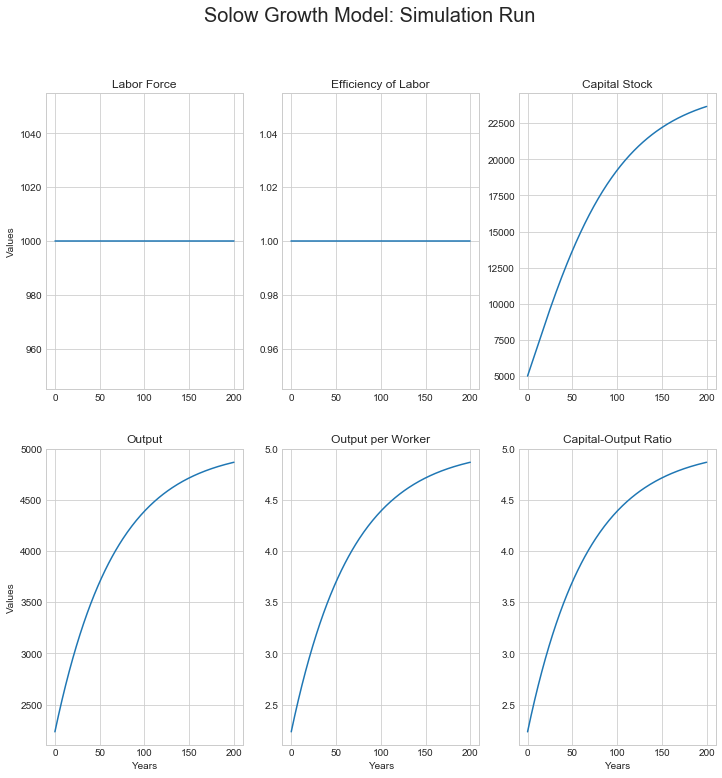

0.0 is the labor force growth rate n
0.0 is the efficiency of labor growth rate g
0.03 is the depreciation rate delta
0.15 is the savings rate s
0.5 is the decreasing-returns-to-scale parameter alpha


In [11]:
# plot the results...

fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(2,3,1)
sg_df.Labor.plot(ax = ax1, title = "Labor Force")
plt.ylabel("Values")

ax2 = plt.subplot(2,3,2)
sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

ax3 = plt.subplot(2,3,3)
sg_df.Capital.plot(ax = ax3, title = "Capital Stock")

ax4 = plt.subplot(2,3,4)
sg_df.Output.plot(ax = ax4, title = "Output")
plt.xlabel("Years")
plt.ylabel("Values")

ax5 = plt.subplot(2,3,5)
sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
plt.xlabel("Years")

ax6 = plt.subplot(2,3,6)
sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
plt.xlabel("Years")

plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

plt.show()

print(n, "is the labor force growth rate n")
print(g, "is the efficiency of labor growth rate g")
print(delta, "is the depreciation rate delta")
print(s, "is the savings rate s")
print(alpha, "is the decreasing-returns-to-scale parameter alpha")


In [12]:
# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff all of that inside a function, so we can then
# invoke it with a single line...

def sgm_200yr_run(L0, E0, K0, n=0, g=0, s=0.15, alpha=0.5, delta=0.03, T = 200):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

    for i in range(T):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(2,3,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Values")

    ax2 = plt.subplot(2,3,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

    ax3 = plt.subplot(2,3,3)
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")

    ax4 = plt.subplot(2,3,4)
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylabel("Values")
    plt.xlabel("Years")

    ax5 = plt.subplot(2,3,5)
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")

    ax6 = plt.subplot(2,3,6)
    sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate: n")
    print(g, "is the efficiency of labor growth rate: g")
    print(delta, "is the depreciation rate: delta")
    print(s, "is the savings rate: s")
    print(alpha, "is the decreasing-returns-to-scale parameter: alpha")

print("Function creation ran without visible errors")

Function creation ran without visible errors


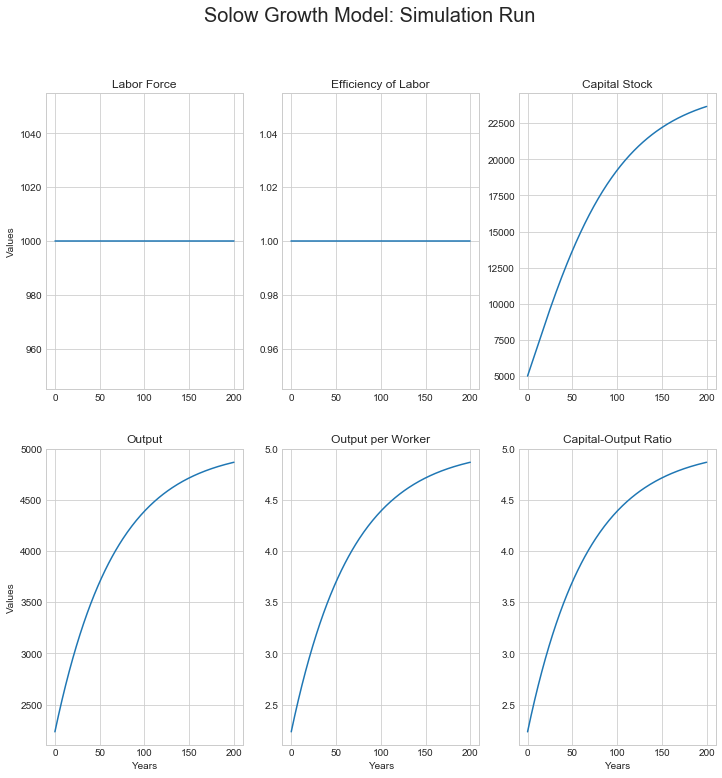

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [13]:
# and repeat our calculations to see if we have gotten it right...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 5000)

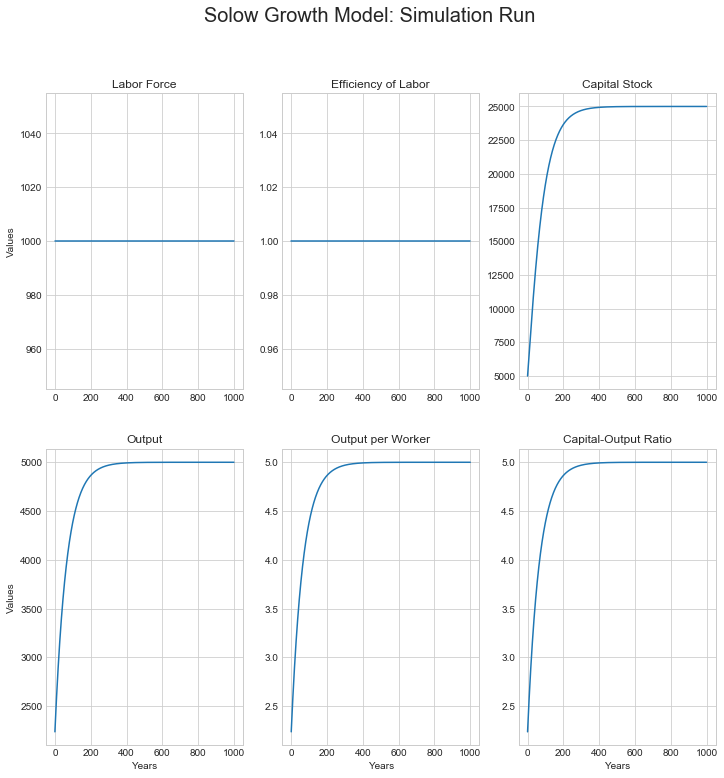

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [14]:
# Is it really heading a situation in which all variables are unchanging?

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 5000, T = 1000)

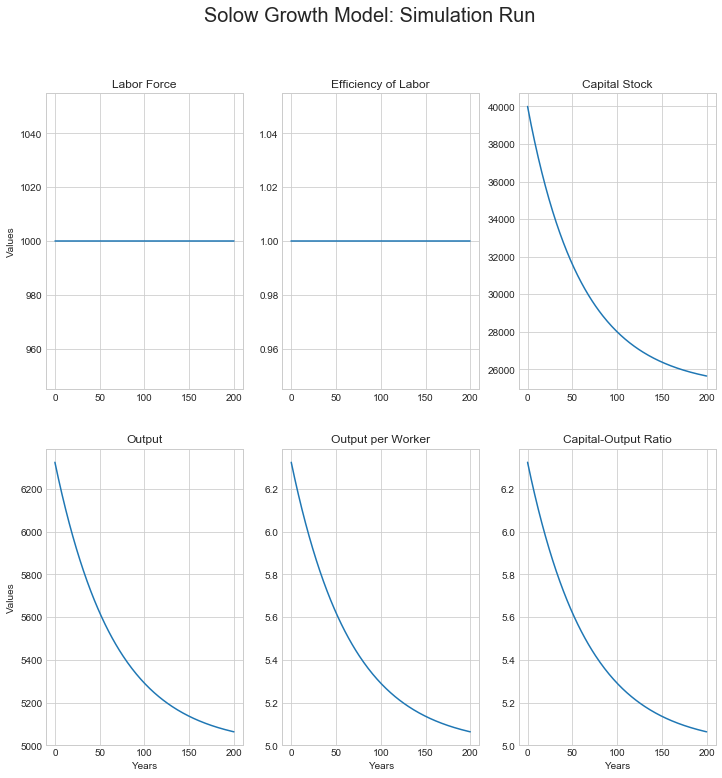

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [15]:
# start with a high rather than a low initial capital stock...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 40000)

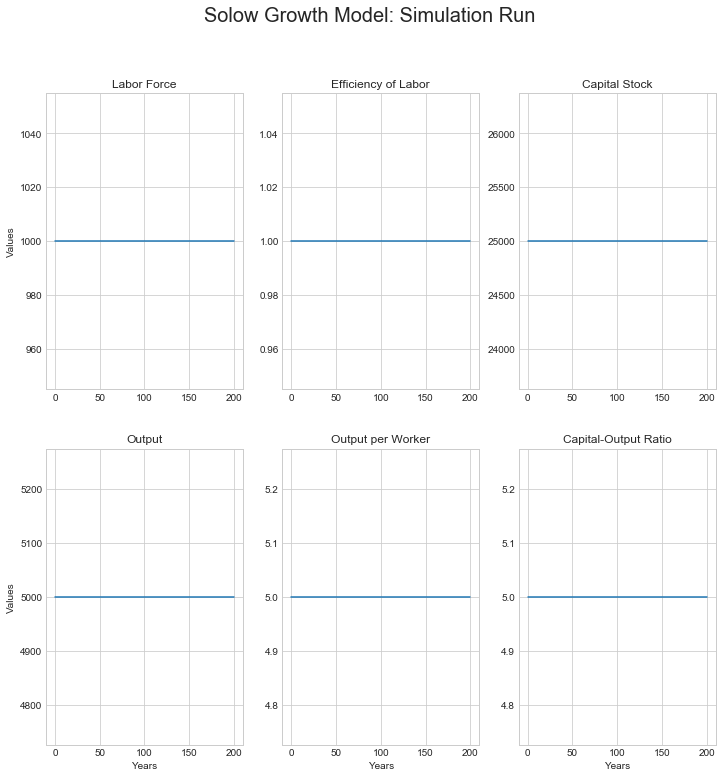

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [16]:
# with an initial capital stock at what looks like the
# asymptote for the K/Y ratio...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 25000)

----

&nbsp;

Set n = 0, g = 0, the economy has no long-run tendency to grow: it heads for a stagnant steady state, with all variables constant, and with the capital output ratio K/Y equal to, in this simulation run, 5. What combination of our parameters might possibly give us a 5? Well 5 = 0.15/.03 = s/δ...

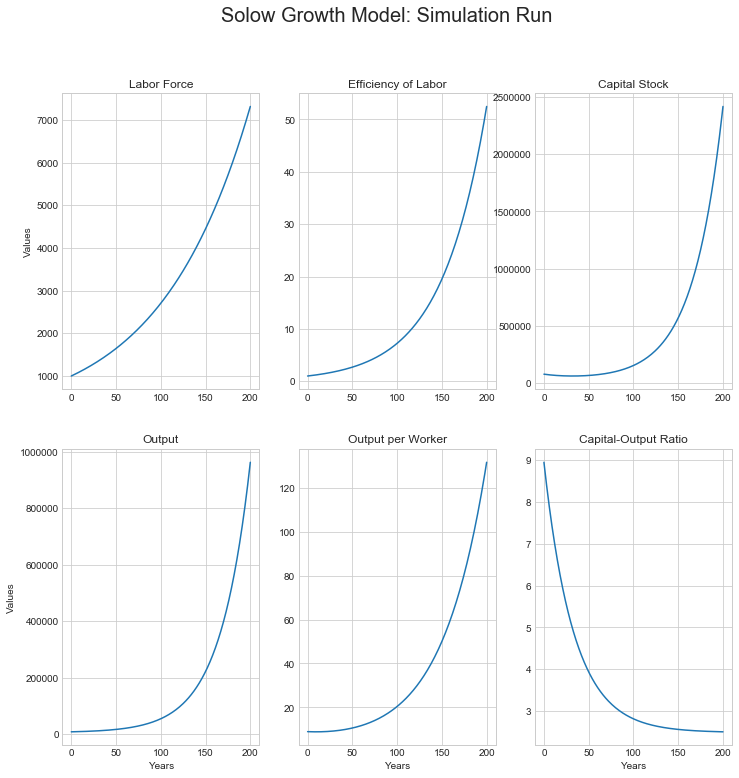

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [17]:
# Now let's let there be some labor-force growth,
# and some efficiency-of-labor growth...
# starting from a high capital stock

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 80000, g = 0.02, n = 0.01,
    s = 0.15)

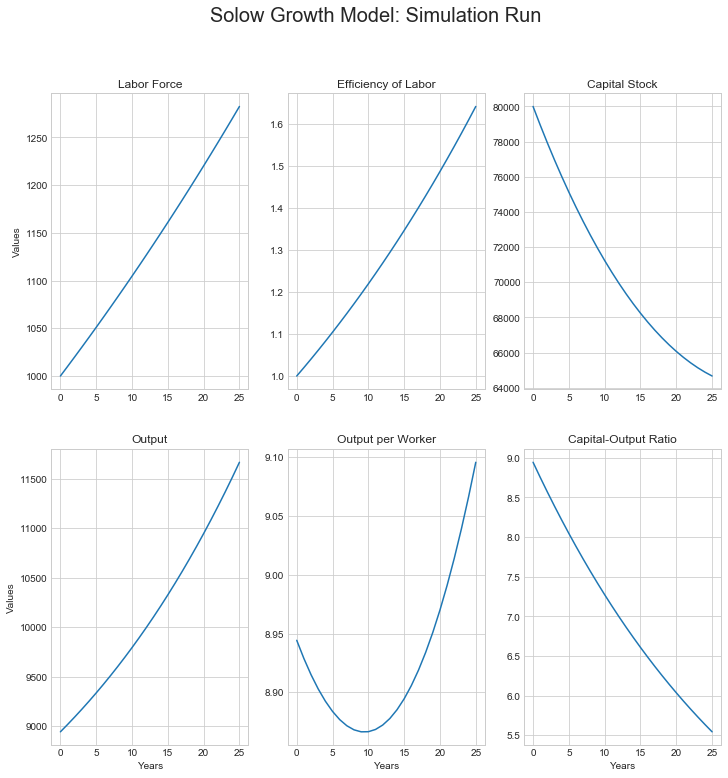

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [18]:
# What happens at the start?

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 80000, g = 0.02, n = 0.01,
    s = 0.15, T=25)

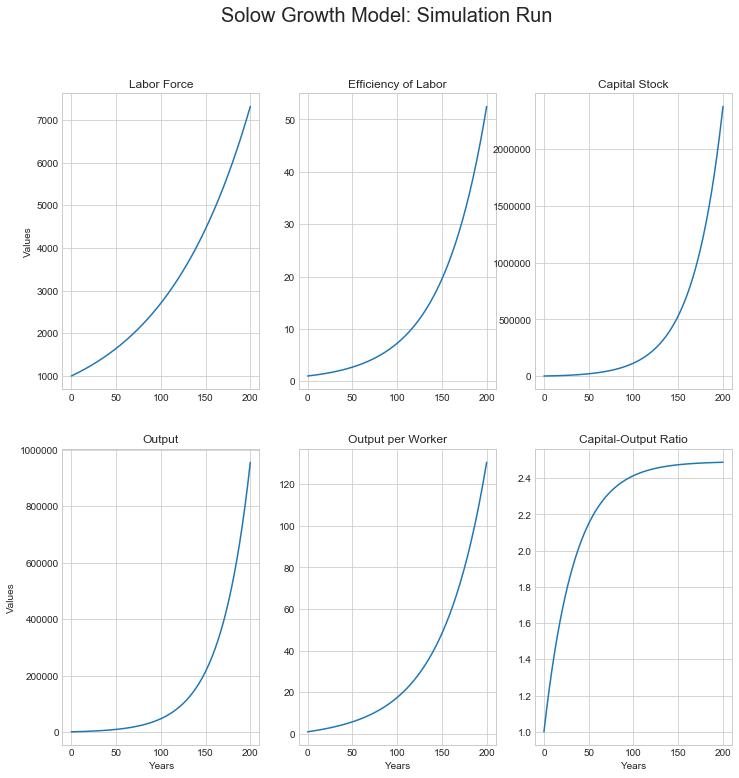

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [19]:
# Now let's start with a low initial capital stock...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 1000, g = 0.02, n = 0.01,
    s = 0.15)

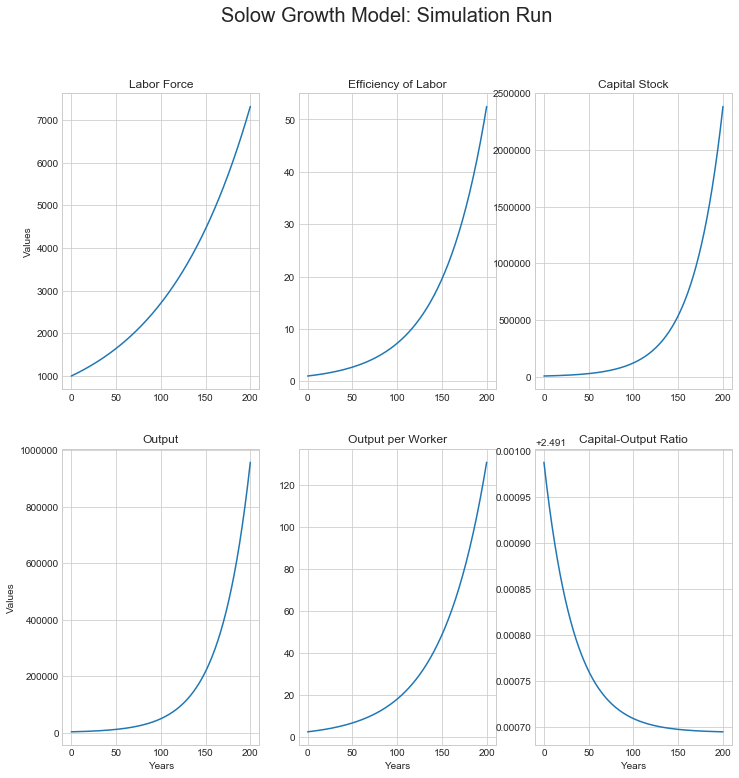

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [20]:
# Now let's start with an intermediate capital stock

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 6210, g = 0.02, n = 0.01,
    s = 0.15, delta = 0.03)

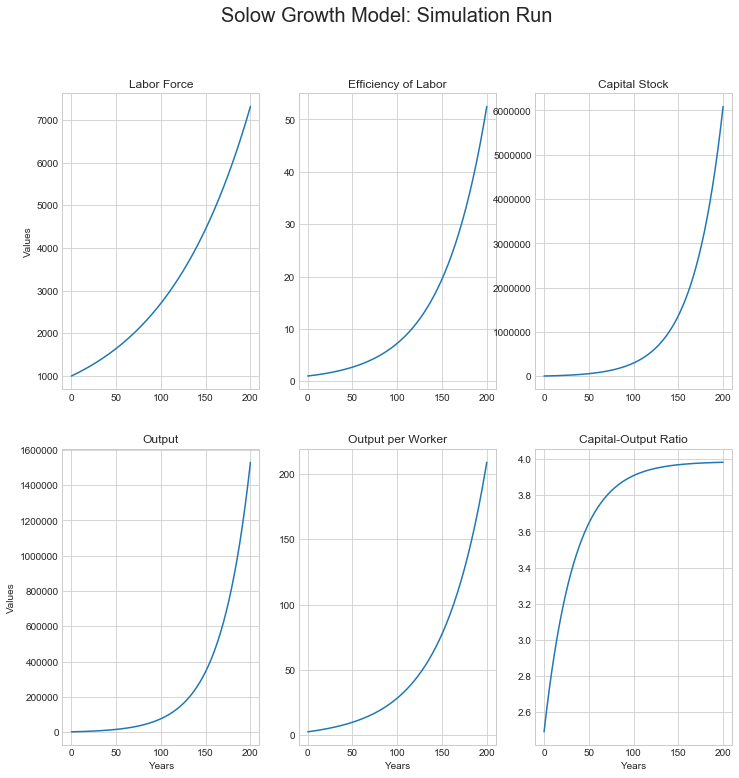

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.24 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [21]:
# Note the asymptote for the capital-output ratio: 2.5±:
# = s/(n+g+delta)
# let's see if this holds in general

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 6210, g = 0.02, n = 0.01,
    s = 0.24, delta = 0.03)

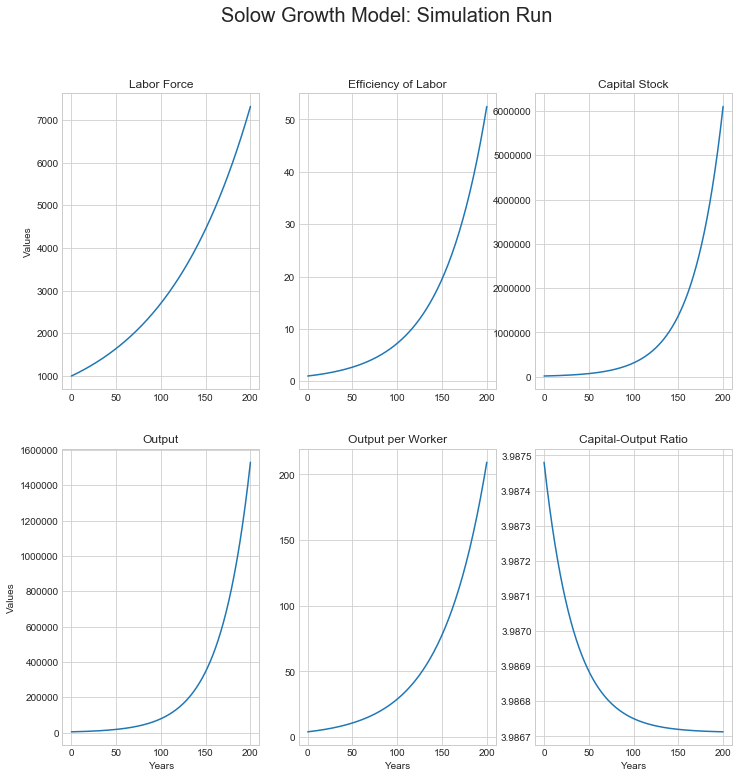

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.24 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [22]:
# What are the rates of growth of this economy in the long run?

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 15900, g = 0.02, n = 0.01,
    s = 0.24, delta = 0.03, T = 200)

In [23]:
# output per worker grows from 50 in year 125 to 210 in year 200

np.log(210/50)/75

0.01913446033719097

In [24]:
# Output per worker grows at the rate of growth of the efficiency
# of labor once the economy has reached its steady-state growth
# path...

# We see that this happens: now we can do the algebra to get
# more insight into why this model works out this way...